In [30]:
%matplotlib inline

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [8]:
# Load Dataset 1: Crash Reports 2017-2018
crash_reports = pd.read_csv(r'D:\Nairobi-Accident-Severity\data\raw\ma3route_crash_reports_2017_2018.csv\KEN_2017-2018_MLCRM_v01_M_CSV\twitter_truth.csv')

In [9]:
print("="*80)
print("DATASET 1: Ma3Route Crash Reports 2017-2018")
print("="*80)
print(f"\nShape: {crash_reports.shape}")
print(f"Rows: {crash_reports.shape[0]:,} | Columns: {crash_reports.shape[1]}")

DATASET 1: Ma3Route Crash Reports 2017-2018

Shape: (9479, 9)
Rows: 9,479 | Columns: 9


In [10]:
print("\n--- Column Names ---")
print(crash_reports.columns.tolist())


--- Column Names ---
['uid', 'tweet_id', 'created_at', 'crash_report', 'latitude', 'longitude', 'crash_id_c1', 'crash_id_c2', 'crash_landmark']


In [13]:
print("\n--- First 5 Rows ---")
print(crash_reports.head())


--- First 5 Rows ---
   uid      tweet_id          created_at  crash_report  latitude  longitude  \
0    1  1.001856e+18  5/30/2018 16:02:24             0       NaN        NaN   
1    2  1.002045e+18  5/31/2018 04:32:54             0       NaN        NaN   
2    3  1.002283e+18  5/31/2018 20:15:54             1       NaN        NaN   
3    4  1.002427e+18   6/1/2018 05:48:54             1       NaN        NaN   
4    5  1.002472e+18   6/1/2018 08:46:54             0       NaN        NaN   

   crash_id_c1  crash_id_c2 crash_landmark  
0          NaN          NaN            NaN  
1          NaN          NaN            NaN  
2          NaN          NaN   toll station  
3          NaN          NaN            NaN  
4          NaN          NaN            NaN  


In [14]:
print("\n--- Data Types ---")
print(crash_reports.dtypes)


--- Data Types ---
uid                 int64
tweet_id          float64
created_at         object
crash_report        int64
latitude          float64
longitude         float64
crash_id_c1       float64
crash_id_c2       float64
crash_landmark     object
dtype: object


In [15]:
print("\n--- Missing Values ---")
print(crash_reports.isnull().sum())


--- Missing Values ---
uid                  0
tweet_id          1755
created_at           0
crash_report         0
latitude          5286
longitude         5288
crash_id_c1       5683
crash_id_c2       5805
crash_landmark    5269
dtype: int64


In [16]:
print("\n--- Summary Statistics ---")
print(crash_reports.describe())


--- Summary Statistics ---
               uid      tweet_id  crash_report     latitude    longitude  \
count  9479.000000  7.724000e+03   9479.000000  4193.000000  4191.000000   
mean   4740.000000  9.572711e+17      0.696381    -1.271560    36.860789   
std    2736.495935  4.433192e+16      0.459844     0.249532     0.272315   
min       1.000000  8.809798e+17      0.000000    -4.059868    34.145808   
25%    2370.500000  9.159139e+17      0.000000    -1.323278    36.807529   
50%    4740.000000  9.630917e+17      1.000000    -1.264518    36.859948   
75%    7109.500000  9.966102e+17      1.000000    -1.232079    36.900834   
max    9479.000000  1.024364e+18      1.000000     1.257331    40.171389   

        crash_id_c1   crash_id_c2  
count   3796.000000   3674.000000  
mean    2875.135142   2937.690256  
std     1356.977100   1370.029766  
min      907.000000    909.000000  
25%     1882.750000   1960.000000  
50%     2859.500000   2948.500000  
75%     3833.250000   3917.500000  

In [17]:
# === DEEPER ANALYSIS ===

print("\n" + "="*80)
print("DETAILED ANALYSIS")
print("="*80)


DETAILED ANALYSIS


In [18]:
# 1. Crash Report Distribution
print("\n--- Target Variable Distribution ---")
print(crash_reports['crash_report'].value_counts())
print(f"\nCrash Rate: {crash_reports['crash_report'].mean()*100:.1f}%")


--- Target Variable Distribution ---
crash_report
1    6601
0    2878
Name: count, dtype: int64

Crash Rate: 69.6%


In [19]:
# 2. Date Range Analysis
print("\n--- Date Range ---")
crash_reports['created_at'] = pd.to_datetime(crash_reports['created_at'])
print(f"Earliest: {crash_reports['created_at'].min()}")
print(f"Latest: {crash_reports['created_at'].max()}")
print(f"Duration: {(crash_reports['created_at'].max() - crash_reports['created_at'].min()).days} days")


--- Date Range ---
Earliest: 2017-07-01 02:41:58
Latest: 2018-07-31 18:40:24
Duration: 395 days


In [20]:
# 3. Time-based patterns
crash_reports['hour'] = crash_reports['created_at'].dt.hour
crash_reports['day_of_week'] = crash_reports['created_at'].dt.day_name()
crash_reports['month'] = crash_reports['created_at'].dt.month

In [21]:
print("\n--- Crashes by Hour of Day ---")
print(crash_reports.groupby('hour')['crash_report'].agg(['count', 'sum', 'mean']))


--- Crashes by Hour of Day ---
      count  sum      mean
hour                      
0       176  115  0.653409
1       147   86  0.585034
2       224  165  0.736607
3       696  555  0.797414
4       886  685  0.773138
5       626  441  0.704473
6       543  354  0.651934
7       515  310  0.601942
8       439  284  0.646925
9       386  220  0.569948
10      425  301  0.708235
11      426  247  0.579812
12      458  295  0.644105
13      584  366  0.626712
14      580  393  0.677586
15      486  337  0.693416
16      442  319  0.721719
17      403  319  0.791563
18      319  257  0.805643
19      169  137  0.810651
20       88   63  0.715909
21       73   54  0.739726
22      181  145  0.801105
23      207  153  0.739130


In [22]:
# 4. Location analysis
print("\n--- GPS Data Availability ---")
has_gps = crash_reports[['latitude', 'longitude']].notna().all(axis=1)
print(f"Records with GPS: {has_gps.sum():,} ({has_gps.mean()*100:.1f}%)")
print(f"Crashes with GPS: {crash_reports[has_gps & (crash_reports['crash_report']==1)].shape[0]:,}")


--- GPS Data Availability ---
Records with GPS: 4,191 (44.2%)
Crashes with GPS: 4,191


In [23]:
# 5. Landmark analysis
print("\n--- Top Crash Landmarks ---")
landmarks = crash_reports[crash_reports['crash_report']==1]['crash_landmark'].value_counts().head(10)
print(landmarks)


--- Top Crash Landmarks ---
crash_landmark
githurai       130
roysambu       102
muthaiga        89
garden city     67
roasters        63
cabanas         59
allsops         58
gm              53
uthiru          51
kinoo           43
Name: count, dtype: int64


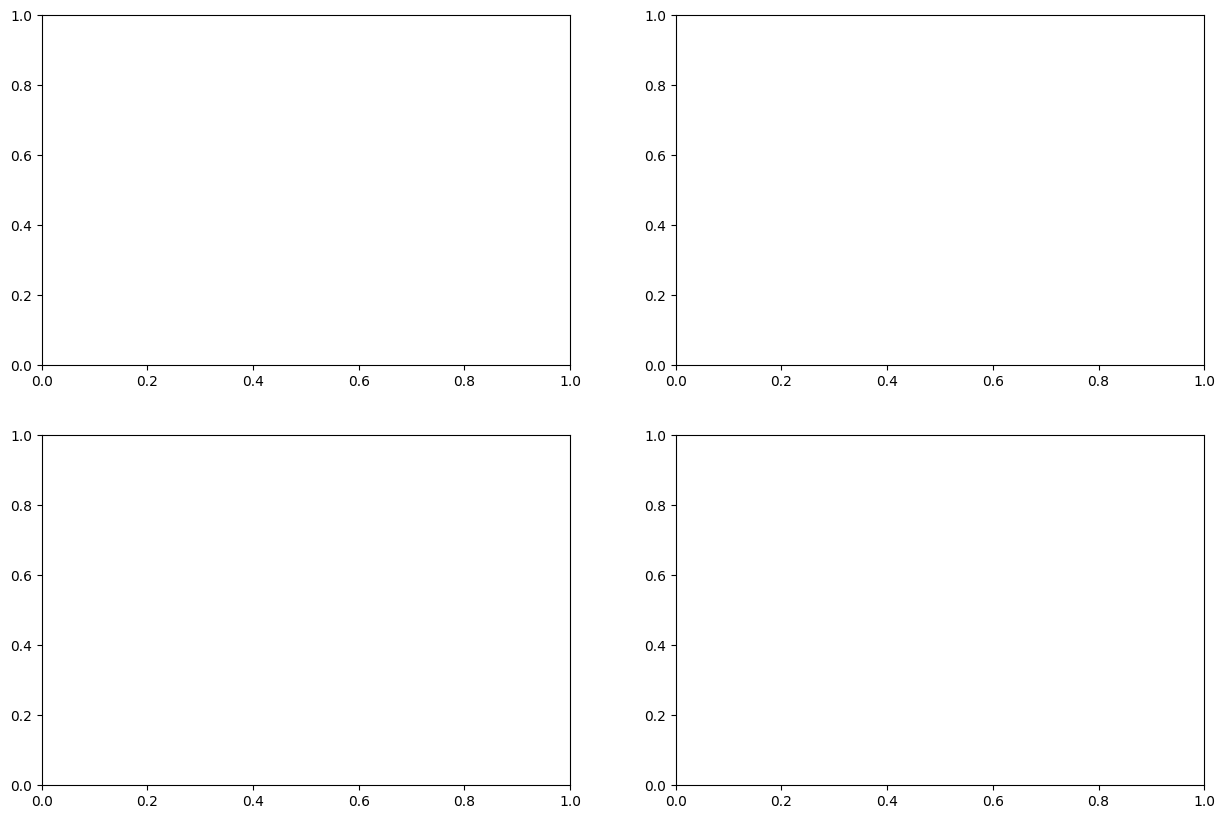

In [31]:
# 6. Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

In [25]:
# Plot 1: Crash vs No Crash
crash_reports['crash_report'].value_counts().plot(kind='bar', ax=axes[0,0], color=['green', 'red'])
axes[0,0].set_title('Crash Reports Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Crash Report (0=No, 1=Yes)')
axes[0,0].set_ylabel('Count')
axes[0,0].set_xticklabels(['No Crash', 'Crash'], rotation=0)

[Text(0, 0, 'No Crash'), Text(1, 0, 'Crash')]

In [26]:
# Plot 2: Crashes by Hour
crash_by_hour = crash_reports.groupby('hour')['crash_report'].sum()
crash_by_hour.plot(kind='line', ax=axes[0,1], marker='o', color='red', linewidth=2)
axes[0,1].set_title('Crashes by Hour of Day', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Hour (24-hour format)')
axes[0,1].set_ylabel('Number of Crashes')
axes[0,1].grid(True, alpha=0.3)

In [27]:
# Plot 3: GPS Coverage
gps_coverage = pd.DataFrame({
    'Has GPS': [has_gps.sum(), (~has_gps).sum()]
}, index=['With GPS', 'Without GPS'])
gps_coverage.plot(kind='pie', y='Has GPS', ax=axes[1,0], autopct='%1.1f%%', 
                   colors=['lightblue', 'lightcoral'], legend=False)
axes[1,0].set_title('GPS Data Availability', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('')

Text(4.444444444444452, 0.5, '')

In [28]:
# Plot 4: Geographic scatter (if GPS available)
gps_data = crash_reports.dropna(subset=['latitude', 'longitude'])
scatter = axes[1,1].scatter(gps_data['longitude'], gps_data['latitude'], 
                            c=gps_data['crash_report'], cmap='RdYlGn_r', 
                            alpha=0.6, s=20)
axes[1,1].set_title('Crash Locations (GPS)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')
axes[1,1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1,1], label='Crash (1=Yes)')

plt.tight_layout()
plt.show()

print("\n✅ Analysis Complete!")

C:\Users\USER\AppData\Local\Temp\ipykernel_18200\1755688926.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 1500x1000 with 5 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, ax=axes[1,1], label='Crash (1=Yes)')


<Figure size 640x480 with 0 Axes>


✅ Analysis Complete!


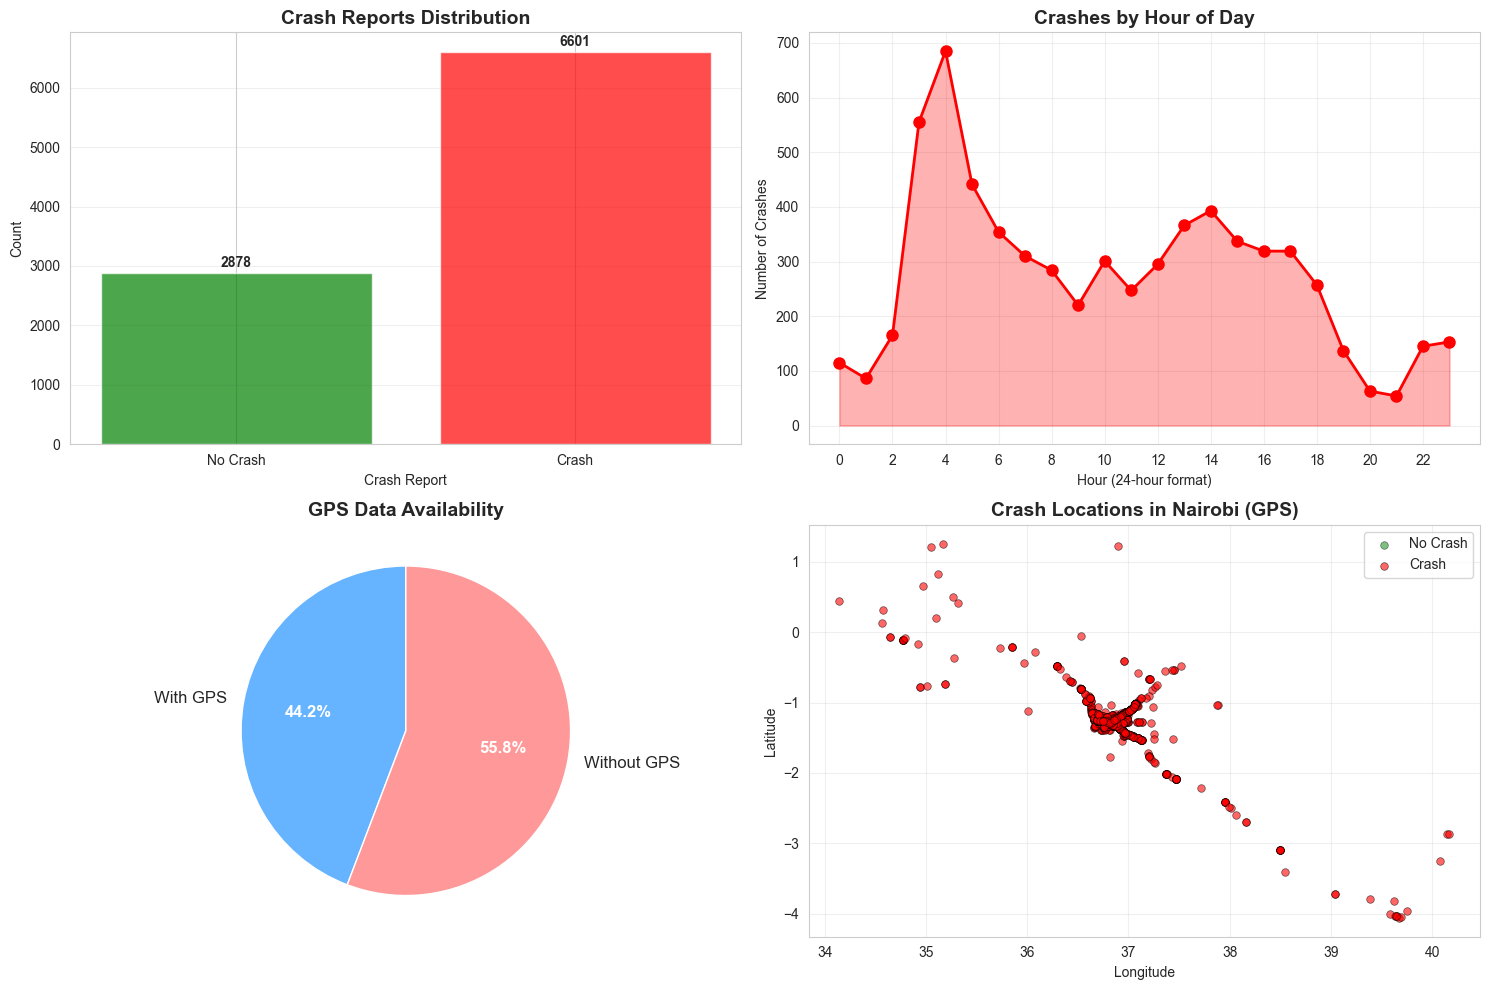


✅ Visualization complete and saved!
📊 Total records: 9,479
🔴 Crashes: 6,601 (69.6%)
🟢 No crashes: 2,878 (30.4%)
📍 Records with GPS: 4,191 (44.2%)


In [34]:
# === COMPLETE VISUALIZATION CODE ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Load data
crash_reports = pd.read_csv(r'D:\Nairobi-Accident-Severity\data\raw\ma3route_crash_reports_2017_2018.csv\KEN_2017-2018_MLCRM_v01_M_CSV\twitter_truth.csv')

# Parse dates
crash_reports['created_at'] = pd.to_datetime(crash_reports['created_at'])
crash_reports['hour'] = crash_reports['created_at'].dt.hour
crash_reports['day_of_week'] = crash_reports['created_at'].dt.day_name()

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ========== PLOT 1: Crash Distribution ==========
crash_counts = crash_reports['crash_report'].value_counts().sort_index()
axes[0,0].bar(['No Crash', 'Crash'], crash_counts.values, color=['green', 'red'], alpha=0.7)
axes[0,0].set_title('Crash Reports Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Crash Report')
axes[0,0].set_ylabel('Count')
axes[0,0].grid(axis='y', alpha=0.3)
# Add counts on bars
for i, v in enumerate(crash_counts.values):
    axes[0,0].text(i, v + 100, str(v), ha='center', fontweight='bold')

# ========== PLOT 2: Crashes by Hour ==========
crash_by_hour = crash_reports[crash_reports['crash_report']==1].groupby('hour').size()
axes[0,1].plot(crash_by_hour.index, crash_by_hour.values, marker='o', color='red', 
               linewidth=2, markersize=8)
axes[0,1].fill_between(crash_by_hour.index, crash_by_hour.values, alpha=0.3, color='red')
axes[0,1].set_title('Crashes by Hour of Day', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Hour (24-hour format)')
axes[0,1].set_ylabel('Number of Crashes')
axes[0,1].set_xticks(range(0, 24, 2))
axes[0,1].grid(True, alpha=0.3)

# ========== PLOT 3: GPS Coverage ==========
has_gps = crash_reports[['latitude', 'longitude']].notna().all(axis=1)
gps_counts = [has_gps.sum(), (~has_gps).sum()]
colors_pie = ['#66b3ff', '#ff9999']
wedges, texts, autotexts = axes[1,0].pie(gps_counts, labels=['With GPS', 'Without GPS'], 
                                           autopct='%1.1f%%', colors=colors_pie,
                                           startangle=90, textprops={'fontsize': 12})
axes[1,0].set_title('GPS Data Availability', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# ========== PLOT 4: Geographic Scatter ==========
gps_data = crash_reports.dropna(subset=['latitude', 'longitude'])
# Separate crashes and non-crashes
crashes = gps_data[gps_data['crash_report'] == 1]
no_crashes = gps_data[gps_data['crash_report'] == 0]

axes[1,1].scatter(no_crashes['longitude'], no_crashes['latitude'], 
                  c='green', alpha=0.5, s=30, label='No Crash', edgecolors='black', linewidth=0.5)
axes[1,1].scatter(crashes['longitude'], crashes['latitude'], 
                  c='red', alpha=0.6, s=30, label='Crash', edgecolors='black', linewidth=0.5)
axes[1,1].set_title('Crash Locations in Nairobi (GPS)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')
axes[1,1].legend(loc='best')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(r'D:\Nairobi-Accident-Severity\reports\figures\data_exploration.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization complete and saved!")
print(f"📊 Total records: {len(crash_reports):,}")
print(f"🔴 Crashes: {crash_counts[1]:,} ({crash_counts[1]/len(crash_reports)*100:.1f}%)")
print(f"🟢 No crashes: {crash_counts[0]:,} ({crash_counts[0]/len(crash_reports)*100:.1f}%)")
print(f"📍 Records with GPS: {has_gps.sum():,} ({has_gps.sum()/len(crash_reports)*100:.1f}%)")

In [33]:
import os

# Create the figures directory
os.makedirs(r'D:\Nairobi-Accident-Severity\reports\figures', exist_ok=True)

print("✅ Folder created successfully!")

✅ Folder created successfully!
